In [ ]:
# !pip install dask[complete]

In [ ]:
# !pip install dask distributed --upgrade

In [ ]:
# !pip install dask
# !pip install cloudpickle
# !pip install "dask[dataframe]"
# !pip install "dask[complete]"

In [1]:
import dask.dataframe as dd

In [ ]:
# !pip show dask

In [2]:
import os
import json
import math
import dask
from dask.distributed import Client
import dask.dataframe as dd
import numpy as np
import dask.multiprocessing

In [3]:
os.listdir()

['.ipynb_checkpoints', 'car_sales_data.csv', 'dask1.ipynb']

Threads = In Dask, threads are a type of parallelism that can be used to execute tasks concurrently. When you execute a Dask computation, it is broken down into smaller tasks that can be executed in parallel. By default, Dask uses a thread-based scheduler to execute these tasks, which means that each task is executed in its own thread.

In [4]:
# from dask.distributed import Client, LocalCluster

client = Client(n_workers=3, threads_per_worker=1, processes=False)
# Create a local Dask cluster with 4 workers
# cluster = LocalCluster(n_workers=4)
# client = Client(cluster)

n_workers=3: This sets the number of worker processes that will be used to execute the computation. In this case, we are using 3 worker processes.

threads_per_worker=1: This sets the number of threads that will be used per worker process. In this case, we are using 1 thread per worker process.

processes=False: This specifies whether to use worker processes (True) or worker threads (False) to execute the computation. In this case, we are using worker threads.

memory_limit='2GB': This sets the amount of memory that each worker process is allowed to use. In this case, each worker process is limited to 2 gigabytes of memory.

In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.1.228:8787/status,
Dashboard: http://192.168.1.228:8787/status,Workers: 3
Total threads: 3,Total memory: 7.70 GiB
Status: running,Using processes: False
Comm: inproc://192.168.1.228/2292/1,Workers: 3
Dashboard: http://192.168.1.228:8787/status,Total threads: 3
Started: Just now,Total memory: 7.70 GiB
Comm: inproc://192.168.1.228/2292/4,Total threads: 1
Dashboard: http://192.168.1.228:51639/status,Memory: 2.57 GiB
Nanny: None,


In [44]:
#client.close()

In [6]:
df = dd.read_csv("car_sales_data.csv", assume_missing=True)

In [7]:
result = df['Sale Price'].sum().compute()

In [8]:
print(result)

75030446855.0


In [9]:
df.shape

(Delayed('int-8f832435-afdd-4f51-a227-5da912a59e9d'), 9)

In [10]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018.0,15983.0,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016.0,38474.0,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016.0,33340.0,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013.0,41937.0,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022.0,20256.0,0.113490,2298.85


In [11]:
df.compute() #shows the detaset properly.

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018.0,15983.0,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016.0,38474.0,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016.0,33340.0,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013.0,41937.0,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022.0,20256.0,0.113490,2298.85
...,...,...,...,...,...,...,...,...,...
833342,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021.0,49823.0,0.062977,3137.70
833343,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022.0,18803.0,0.068339,1284.97
833344,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010.0,30863.0,0.088915,2744.19
833345,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014.0,26125.0,0.088260,2305.80


In [12]:
df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

In [13]:
df.isnull().compute().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [14]:
#we have the option to select the specific columns in dask.

df["Salesperson"].head(1)

0    Monica Moore MD
Name: Salesperson, dtype: object

In [15]:
df[["Date","Salesperson"]].head(2)

,Date,Salesperson
0,2022-08-01,Monica Moore MD
1,2023-03-15,Roberto Rose


In [16]:
#applaying functions..

def toupper(x):
    return x.upper()

In [17]:
df.Date = df["Date"].map(toupper)

In [18]:
df.Date.head(2)

0    2022-08-01
1    2023-03-15
Name: Date, dtype: object

In [19]:
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year             float64
Sale Price           float64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [20]:
df['Sale Price'].describe()

Dask Series Structure:
npartitions=1
    float64
        ...
Name: Sale Price, dtype: float64
Dask Name: describe-numeric, 22 graph layers

In [21]:
#to get describe about sales price.
df['Sale Price'].describe().compute()

count    2.500000e+06
mean     3.001218e+04
std      1.154514e+04
min      1.000000e+04
25%      2.004000e+04
50%      3.001700e+04
75%      4.002900e+04
max      5.000000e+04
Name: Sale Price, dtype: float64

In [22]:
#to get mean of the column.
df_mean = df['Sale Price'].mean()

In [23]:
df_mean.compute()

30012.178742

In [24]:
df[df['Sale Price'] > 10000].head(5)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018.0,15983.0,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016.0,38474.0,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016.0,33340.0,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013.0,41937.0,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022.0,20256.0,0.113490,2298.85


In [25]:
#a question for you all. how can you say 
df[df['Sale Price'] > 40000].compute()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013.0,41937.0,0.092191,3866.20
6,2022-06-12,Ashley Brown,Tyler Lawson,Honda,F-150,2013.0,41397.0,0.142780,5910.67
7,2022-06-20,Norma Watkins,Michael Bond,Ford,Altima,2015.0,46233.0,0.071624,3311.38
10,2023-03-12,Harold Nelson,Isaac Patton,Honda,Silverado,2021.0,41259.0,0.092541,3818.16
11,2023-01-29,Richard Richardson,Justin Gray,Toyota,Silverado,2022.0,48224.0,0.090592,4368.72
...,...,...,...,...,...,...,...,...,...
833327,2023-03-21,Jesse Thomas,Holly Evans,Honda,Altima,2015.0,40685.0,0.077628,3158.31
833337,2022-12-22,Martha Snyder,Mrs. Suzanne Glenn PhD,Chevrolet,Silverado,2018.0,45155.0,0.094007,4244.89
833340,2022-07-28,Nicholas Silva,Kyle Garcia,Chevrolet,Civic,2012.0,42240.0,0.069230,2924.27
833341,2022-07-04,Matthew Townsend,Nicole Clay,Chevrolet,Civic,2022.0,49338.0,0.067826,3346.40


In [26]:
#we want to fine the vehicles registered on 2017. can we. now??


df[df['Car Year'] == 2017].compute()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
12,2022-05-29,Mia Acosta,Rebecca Best,Ford,Altima,2017.0,36409.0,0.122349,4454.60
60,2023-04-19,Christina Avery,Courtney Miller,Nissan,Silverado,2017.0,21618.0,0.145338,3141.92
67,2022-10-04,Christopher Taylor,Denise Carter,Chevrolet,F-150,2017.0,29518.0,0.072624,2143.72
70,2023-04-03,Laura Huff,Michael Lewis,Chevrolet,Altima,2017.0,26262.0,0.123232,3236.32
122,2023-04-27,Brenda Gardner,Anna Owen,Honda,Altima,2017.0,29381.0,0.121838,3579.72
...,...,...,...,...,...,...,...,...,...
833301,2022-06-22,David Waters,Alexander Simmons,Nissan,Silverado,2017.0,15831.0,0.079768,1262.80
833302,2022-11-13,Kevin Larson,Juan Ramirez,Ford,Corolla,2017.0,20436.0,0.131013,2677.38
833303,2023-02-10,Lisa Miller,Amanda Hendrix,Nissan,Civic,2017.0,29174.0,0.052473,1530.85
833321,2023-02-19,Jennifer Knight,Natasha Harvey,Nissan,F-150,2017.0,44136.0,0.120356,5312.04


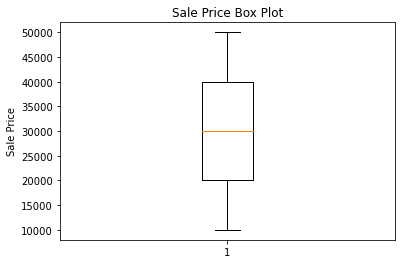

In [27]:
#in pandas we can use seaborn. but dask does not support seaborn so we are using mathplotlib..
import matplotlib.pyplot as plt

# create a box plot of the 'ApplicantIncome' column using matplotlib
fig, ax = plt.subplots()
ax.boxplot(df['Sale Price'].compute())
ax.set_title('Sale Price Box Plot')
ax.set_ylabel('Sale Price')

# show the plot
plt.show()

In [28]:
#slicing the columns using dask

df[:]['Sale Price'].head(3)

0    15983.0
1    38474.0
2    33340.0
Name: Sale Price, dtype: float64

In [29]:
df[:]['Sale Price'].head(3)

0    15983.0
1    38474.0
2    33340.0
Name: Sale Price, dtype: float64

In [30]:
df.iloc[:, 0:1].head(4)

,Date
0,2022-08-01
1,2023-03-15
2,2023-04-29
3,2022-09-04


In [31]:
df.iloc[:,[1,3]].head(5)  # select by column number...
# here [1,3] is displaying only that columns.

,Salesperson,Car Make
0,Monica Moore MD,Nissan
1,Roberto Rose,Nissan
2,Ashley Ramos,Ford
3,Patrick Harris,Ford
4,Eric Lopez,Honda


In [32]:
df

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
npartitions=3,,,,,,,,,
,object,object,object,object,object,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [33]:
ddf_sales = df.set_index('Car Make', drop=False)
ddf_sales.compute()

2023-05-04 15:42:54,424 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.84 GiB -- Worker memory limit: 2.57 GiB
2023-05-04 15:43:05,163 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.68 GiB -- Worker memory limit: 2.57 GiB


,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
Car Make,,,,,,,,,
Chevrolet,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010.0,30863.0,0.088915,2744.19
Chevrolet,2022-08-02,Kimberly Jackson,Matthew Robles,Chevrolet,Civic,2018.0,18836.0,0.138699,2612.53
Chevrolet,2022-08-09,Lisa Villarreal,Cynthia Hess,Chevrolet,Silverado,2016.0,15707.0,0.129396,2032.43
Chevrolet,2022-09-11,Kevin Long,Barbara Pratt,Chevrolet,Corolla,2019.0,18651.0,0.093336,1740.81
Chevrolet,2023-01-21,Janice Mccoy,Mary Garcia,Chevrolet,Silverado,2010.0,39752.0,0.061179,2431.97
...,...,...,...,...,...,...,...,...,...
Toyota,2023-03-12,Daniel Morgan,Anthony Myers,Toyota,Altima,2017.0,33249.0,0.053700,1785.47
Toyota,2022-11-11,Sherry Collins,Jonathan Baker,Toyota,Corolla,2012.0,13825.0,0.141988,1962.98
Toyota,2022-09-25,Ricky Burke,Kiara Davis,Toyota,Silverado,2013.0,10333.0,0.107181,1107.50


In [34]:
honda_sales = ddf_sales.loc[ddf_sales['Car Make'] == 'Honda'].sum()

In [35]:
print(honda_sales)

Dask Series Structure:
npartitions=1
Car Make       object
Salesperson       ...
dtype: object
Dask Name: dataframe-sum-agg, 16 graph layers


2023-05-04 15:50:25,709 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 2.07 GiB -- Worker memory limit: 2.57 GiB
2023-05-04 15:50:25,901 - distributed.worker.memory - WARNING - Worker is at 88% memory usage. Pausing worker.  Process memory: 2.27 GiB -- Worker memory limit: 2.57 GiB
2023-05-04 15:50:25,997 - distributed.worker.memory - WARNING - Worker is at 88% memory usage. Pausing worker.  Process memory: 2.27 GiB -- Worker memory limit: 2.57 GiB
2023-05-04 15:50:26,895 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 2.02 GiB -- Worker memory limit: 2.57 GiB
2023-05-04 15:50:26,975 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 1.99 GiB -- Worker memory limit: 2.57 GiB
2023-05-04 15:50:26,981 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 1.99 GiB -- Worker mem

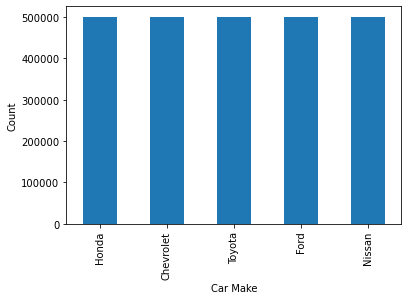

Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: Car Make, dtype: int64

In [38]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import dask.diagnostics
# Create a count plot of the 'Dependents' column
with dask.diagnostics.ProgressBar():
    fig, ax = plt.subplots()
    ax = df['Car Make'].value_counts().compute().plot(kind='bar', ax=ax)
    ax.set_xlabel('Car Make')
    ax.set_ylabel('Count')
    plt.show()
    
# Get the value counts of the 'Dependents' column
df['Car Make'].value_counts().compute()

In [39]:
df.head(5)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018.0,15983.0,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016.0,38474.0,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016.0,33340.0,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013.0,41937.0,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022.0,20256.0,0.113490,2298.85


In [ ]:
com_sale = df.groupby('Sale Price')['Commission Earned'].sum().compute()

In [ ]:
# Set plot title and axis labels
ax.set_title('commission earned on sales')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Commision earned')

In [ ]:
#create a bar plot

fig, ax = plt.subplots(figsize=(10, 16))
com_sale.plot(kind='bar', ax=ax)

import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler




# Apply standard scaling to numeric features
scaler = StandardScaler()
ddf[['Sales_Amount', 'Discount_Amount', 'total_sales']] = scaler.fit_transform(ddf[['Sales_Amount', 'Discount_Amount', 'total_sales']])

# Apply one-hot encoding to categorical features
ddf = dd.get_dummies(ddf, columns=['Product_Type'])

# Drop irrelevant features
ddf = ddf.drop(['Sale_Date', 'Customer_ID'], axis=1)

# Persist the processed data to avoid recomputing
ddf = ddf.persist()


# Feature engineering

In [41]:
!pip install dask_ml

In [43]:
from dask_ml.preprocessing import StandardScaler


AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric32'